In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
import folium
from folium.plugins import HeatMap
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)
df= pd.read_csv('hotel_bookings.csv', sep=',')
#print(df.shape)
df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
0                          0       2       0.0       0   BB     PRT   
1                          0       2       0.0       0   BB     PRT   
2                          1       1       0.0       0   BB     GBR   
3                          1       1       0.0       0   BB     GBR   
4                          2       2       0.0       0   BB     GBR   
...                      ...     ...       ...     ...  ...     ...   
119385                     5       2       0.0       0   BB     BEL   
119386                     5       3       0.0       0   BB     FRA   
119387                     5       2       0.0       0   BB     DEU   
119388                     5       2       0.0       0   BB     GBR   
119389                     7       2       0.0       0   HB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
0              Direct               Direct                  0   
1              Direct               Direct                  0   
2              Direct               Direct                  0   
3           Corporate            Corporate                  0   
4           Online TA                TA/TO                  0   
...               ...                  ...                ...   
119385  Offline TA/TO                TA/TO                  0   
119386      Online TA                TA/TO                  0   
119387      Online TA                TA/TO                  0   
119388      Online TA                TA/TO                  0   
119389      Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
0                            0                               0   
1                            0        

In [2]:
# Afficher les informations sur le DataFrame
print(df.info())
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [3]:
#Nombre de lignes
print("Nombre de lignes :", df.shape[0])
print("--------------------------------------------")

#Nombre de colonnes
print("Nombre de colonnes :", df.shape[1])
print("--------------------------------------------")

#Types des colonnes
print("le type de chaque colonne : \n",df.dtypes)
print("--------------------------------------------")

#Modification des noms de colonnes en minuscules
df.columns = df.columns.str.lower()
df

Nombre de lignes : 119390
--------------------------------------------
Nombre de colonnes : 32
--------------------------------------------
le type de chaque colonne : 
 hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type              

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
0                          0       2       0.0       0   BB     PRT   
1                          0       2       0.0       0   BB     PRT   
2                          1       1       0.0       0   BB     GBR   
3                          1       1       0.0       0   BB     GBR   
4                          2       2       0.0       0   BB     GBR   
...                      ...     ...       ...     ...  ...     ...   
119385                     5       2       0.0       0   BB     BEL   
119386                     5       3       0.0       0   BB     FRA   
119387                     5       2       0.0       0   BB     DEU   
119388                     5       2       0.0       0   BB     GBR   
119389                     7       2       0.0       0   HB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
0              Direct               Direct                  0   
1              Direct               Direct                  0   
2              Direct               Direct                  0   
3           Corporate            Corporate                  0   
4           Online TA                TA/TO                  0   
...               ...                  ...                ...   
119385  Offline TA/TO                TA/TO                  0   
119386      Online TA                TA/TO                  0   
119387      Online TA                TA/TO                  0   
119388      Online TA                TA/TO                  0   
119389      Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
0                            0                               0   
1                            0        

In [4]:
print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


In [5]:
for i in df.columns:
    customer_types = df[i].unique()
    print("les valeurs uniques de la colonne ",i,":\n",customer_types)
    print("-----------------------------------------------------------------")

les valeurs uniques de la colonne  hotel :
 ['Resort Hotel' 'City Hotel']
-----------------------------------------------------------------
les valeurs uniques de la colonne  is_canceled :
 [0 1]
-----------------------------------------------------------------
les valeurs uniques de la colonne  lead_time :
 [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 

In [6]:
#  Lignes en double
doublons = df.duplicated().sum()
print("\nNombre de lignes en double (à l'exclusion de l'ID):", doublons)
print("-----------------------------------------------------------")


Nombre de lignes en double (à l'exclusion de l'ID): 31994
-----------------------------------------------------------


In [7]:
#  Valeurs manquantes
valeurs_manquantes = df.isnull().sum()
print(valeurs_manquantes)
print("Part des valeurs manquantes :\n", valeurs_manquantes / len(df))
print("-----------------------------------------------------------")

pourcentage_valeurs_manquantes = (valeurs_manquantes / len(df)) * 100
print("\nNombre de valeurs manquantes dans chaque colonne:")
print("-----------------------------------------------------------")

print(valeurs_manquantes)
print("\nPourcentage de valeurs manquantes dans chaque colonne:")
print(pourcentage_valeurs_manquantes)
print("-----------------------------------------------------------")

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
# Colonnes presque vides
colonnes_presque_vides = [colonne for colonne in df.columns if df[colonne].isnull().sum() >= 0.9 * len(df)]
print("\nColonnes (presque) vides et pouvant être supprimées:",colonnes_presque_vides)


Colonnes (presque) vides et pouvant être supprimées: ['company']


In [9]:
# les valejurs nulls 
null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null

Null Values  Percentage Null Values
hotel                                     0                0.000000
is_canceled                               0                0.000000
lead_time                                 0                0.000000
arrival_date_year                         0                0.000000
arrival_date_month                        0                0.000000
arrival_date_week_number                  0                0.000000
arrival_date_day_of_month                 0                0.000000
stays_in_weekend_nights                   0                0.000000
stays_in_week_nights                      0                0.000000
adults                                    0                0.000000
children                                  4                0.003350
babies                                    0                0.000000
meal                                      0                0.000000
country                                 488                0.408744
market_segment                            0                0.000000
distribution_channel                      0                0.000000
is_repeated_guest                         0                0.000000
previous_cancellations                    0                0.000000
previous_bookings_not_canceled            0                0.000000
reserved_room_type                        0                0.000000
assigned_room_type                        0                0.000000
booking_changes                           0                0.000000
deposit_type                              0                0.000000
agent                                 16340               13.686238
company                              112593               94.306893
days_in_waiting_list                      0                0.000000
customer_type                             0                0.000000
adr                                       0                0.000000
required_car_parking_spaces               0                0.000000
total_of_special_requests                 0                0.000000
reservation_status                        0                0.000000
reservation_status_date                   0                0.000000

In [10]:
# adults, babies and children cant be zero at same time, so dropping the rows having all these zero at same time

filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
df[filter]

df = df[~filter]
df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
0                          0       2       0.0       0   BB     PRT   
1                          0       2       0.0       0   BB     PRT   
2                          1       1       0.0       0   BB     GBR   
3                          1       1       0.0       0   BB     GBR   
4                          2       2       0.0       0   BB     GBR   
...                      ...     ...       ...     ...  ...     ...   
119385                     5       2       0.0       0   BB     BEL   
119386                     5       3       0.0       0   BB     FRA   
119387                     5       2       0.0       0   BB     DEU   
119388                     5       2       0.0       0   BB     GBR   
119389                     7       2       0.0       0   HB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
0              Direct               Direct                  0   
1              Direct               Direct                  0   
2              Direct               Direct                  0   
3           Corporate            Corporate                  0   
4           Online TA                TA/TO                  0   
...               ...                  ...                ...   
119385  Offline TA/TO                TA/TO                  0   
119386      Online TA                TA/TO                  0   
119387      Online TA                TA/TO                  0   
119388      Online TA                TA/TO                  0   
119389      Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
0                            0                               0   
1                            0        

# Statistique descriptive

In [11]:
plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)
country_wise_guests = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests
basemap = folium.Map()
guests_map = px.choropleth(country_wise_guests, locations = country_wise_guests['country'],
                           color = country_wise_guests['No of guests'], hover_name = country_wise_guests['country'])
guests_map.show()


Statistiques descriptives pour 'is_canceled':
count    119210.000000
mean          0.370766
std           0.483012
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: is_canceled, dtype: float64


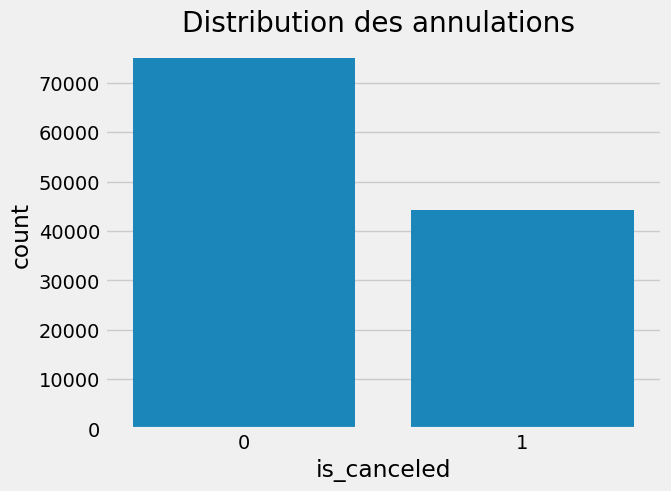

In [12]:
print("\nStatistiques descriptives pour 'is_canceled':")
print(df['is_canceled'].describe())
sns.countplot(x='is_canceled', data=df)
plt.title('Distribution des annulations ')
plt.show()



# Data Pre Processing

# 1- Matrice de correlation

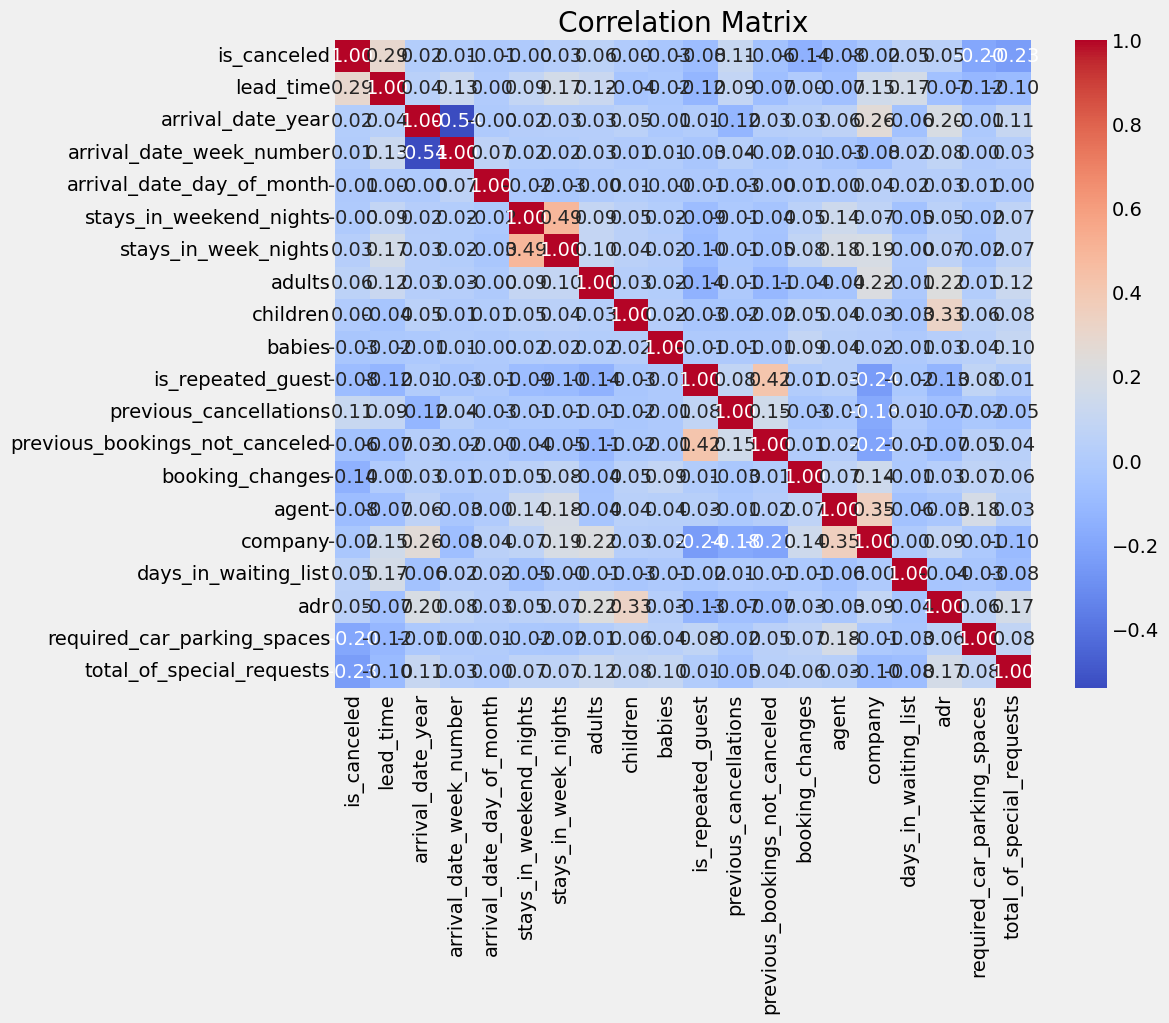

In [13]:
# Exclude non-numeric columns from correlation calculation
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_cols]
'''La matrice de corrélation permet de déterminer les relations linéaires entre les variables,
ce qui peut être utile pour comprendre comment les différentes variables sont liées les unes aux autres dans le jeu de données.

Après avoir calculé la matrice de corrélation, le code utilise la bibliothèque Seaborn pour créer un heatmap (carte thermique)
qui visualise les valeurs de corrélation. Cela permet une compréhension visuelle rapide des relations entre les variables.

En résumé, le code fournit une analyse de base des relations entre les variables numériques dans le jeu de données,
ce qui peut être utile pour des tâches telles que l'exploration des données et la modélisation prédictive. '''
# Calculate correlation matrix
correlation_matrix = df_numeric.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Analyse des relations de variables


In [14]:
plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)
country_wise_guests = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests
basemap = folium.Map()
guests_map = px.choropleth(country_wise_guests, locations = country_wise_guests['country'],
                           color = country_wise_guests['No of guests'], hover_name = country_wise_guests['country'])
guests_map.show()

# Le nombre de nuits par type d'hôtel

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


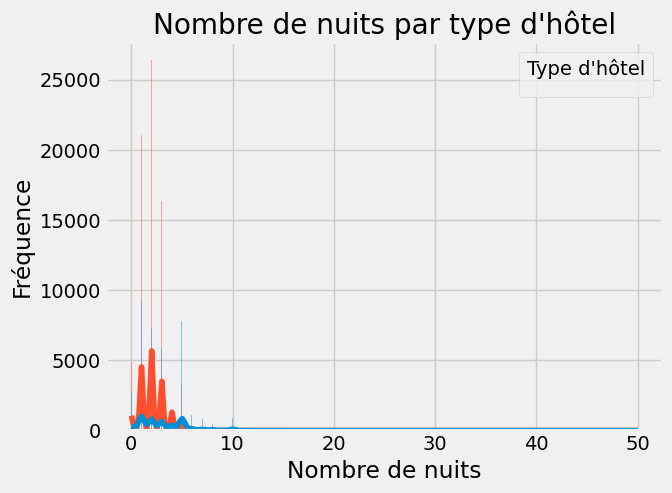

In [15]:
# Afficher le nombre de nuits par type d'hôtel
sns.histplot(data=df, x='stays_in_week_nights', hue='hotel', kde=True)
plt.title('Nombre de nuits par type d\'hôtel')
plt.xlabel('Nombre de nuits')
plt.ylabel('Fréquence')
plt.legend(title='Type d\'hôtel')
plt.show()

C:\Users\goutali_abir\AppData\Local\Temp\ipykernel_14196\2879542065.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




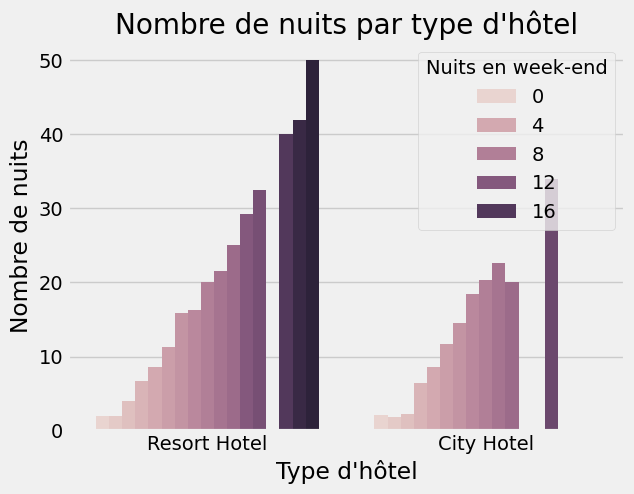

In [16]:
# Diagramme en barres empilées
sns.barplot(data=df, x='hotel', y='stays_in_week_nights', hue='stays_in_weekend_nights', ci=None)
plt.title('Nombre de nuits par type d\'hôtel')
plt.xlabel('Type d\'hôtel')
plt.ylabel('Nombre de nuits')
plt.legend(title='Nuits en week-end')
plt.show()

In [17]:
#Both hotels have different room types and different meal arrangements.Seasonal factors are also important, So the prices varies a lot.
data = df[df['is_canceled'] == 0]

px.box(data_frame = data, x = 'reserved_room_type', y = 'adr', color = 'hotel', template = 'plotly_dark')

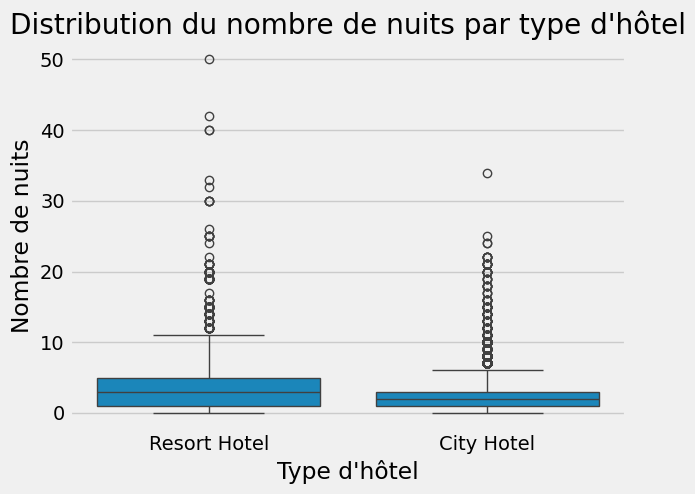

In [18]:

# Diagramme en boîte et moustaches
sns.boxplot(data=df, x='hotel', y='stays_in_week_nights')
plt.title('Distribution du nombre de nuits par type d\'hôtel')
plt.xlabel('Type d\'hôtel')
plt.ylabel('Nombre de nuits')
plt.show()

Les valeurs manquantes : 112442


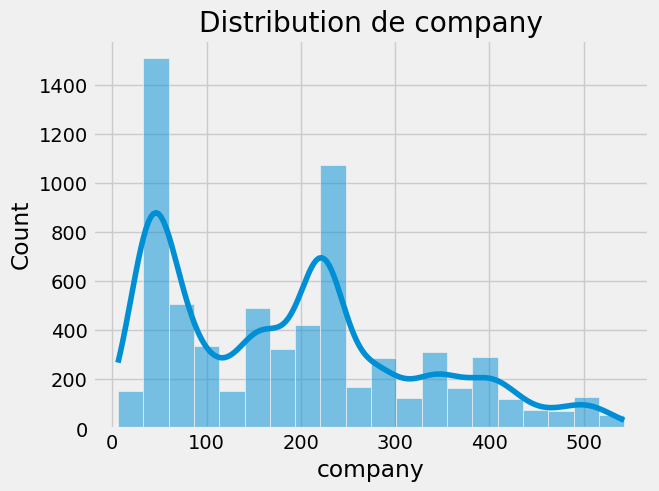

In [19]:
# Valeurs manquantes pour 'company'
print("Les valeurs manquantes :",df['company'].isnull().sum())
sns.histplot(x='company', data=df, bins=20, kde=True)
plt.title('Distribution de company')
plt.show()

# Nombre de nuits par type de client

C:\Users\goutali_abir\AppData\Local\Temp\ipykernel_14196\26318667.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




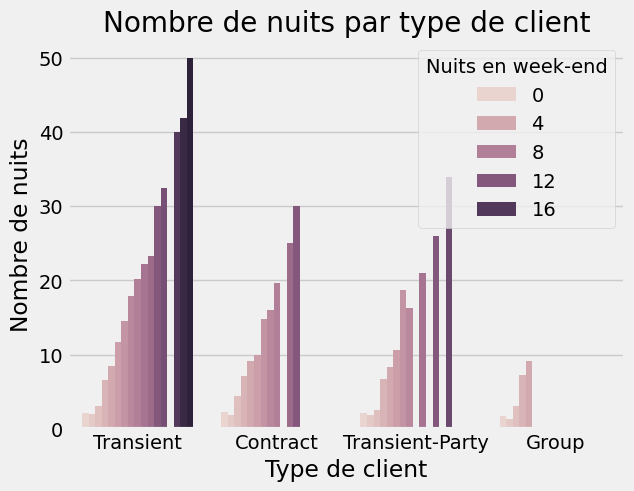

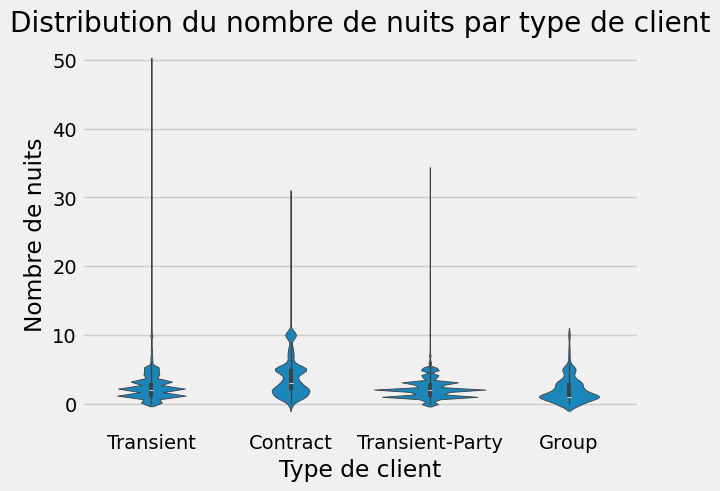

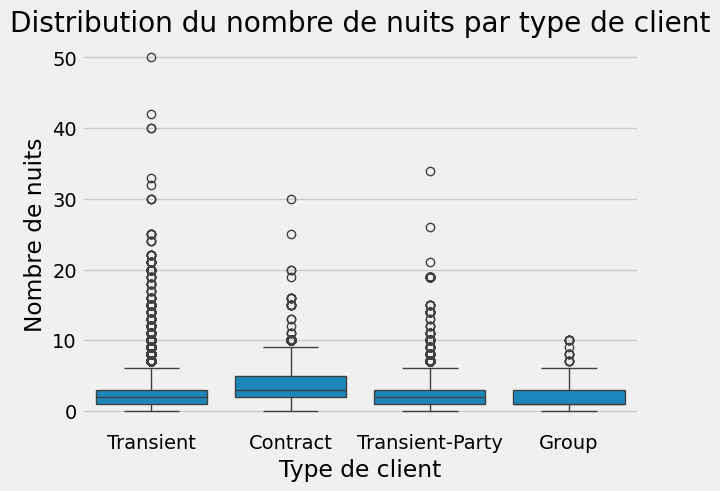

In [20]:
# Diagramme en barres empilées
sns.barplot(data=df, x='customer_type', y='stays_in_week_nights', hue='stays_in_weekend_nights', ci=None)
plt.title('Nombre de nuits par type de client')
plt.xlabel('Type de client')
plt.ylabel('Nombre de nuits')
plt.legend(title='Nuits en week-end')
plt.show()

# Diagramme en violon
sns.violinplot(data=df, x='customer_type', y='stays_in_week_nights')
plt.title('Distribution du nombre de nuits par type de client')
plt.xlabel('Type de client')
plt.ylabel('Nombre de nuits')
plt.show()

# Diagramme en boîte et moustaches
sns.boxplot(data=df, x='customer_type', y='stays_in_week_nights')
plt.title('Distribution du nombre de nuits par type de client')
plt.xlabel('Type de client')
plt.ylabel('Nombre de nuits')
plt.show()

In [21]:
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_hotel
import sort_dataframeby_monthorweek as sd

def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)
final_prices = sort_month(final_hotel, 'month')
final_prices
plt.figure(figsize = (17, 8))

px.line(final_prices, x = 'month', y = ['price_for_resort','price_for_city_hotel'],
        title = 'Room price per night over the Months', template = 'plotly_dark')

<Figure size 1700x800 with 0 Axes>

# Analyse croisée

#   Analyse croisée entre le type d'hôtel et le type de client

Analyse croisée entre le type d'hôtel et le type de client (nombre total de nuits en semaine):
customer_type  Contract  Group  Transient  Transient-Party
hotel                                                     
City Hotel         4836    519     133275            34010
Resort Hotel      10859    651      91110            22669


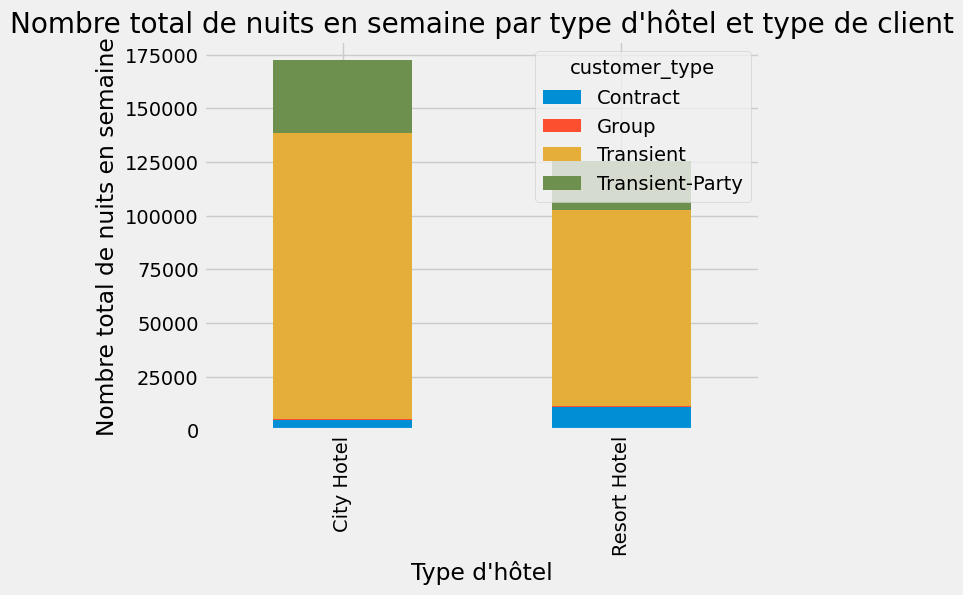

In [22]:
# Effectuer une analyse croisée entre le type d'hôtel et le type de client
cross_tab = pd.crosstab(index=df['hotel'], columns=df['customer_type'], values=df['stays_in_week_nights'], aggfunc='sum')

# Afficher la table croisée
print("Analyse croisée entre le type d'hôtel et le type de client (nombre total de nuits en semaine):")
print(cross_tab)

# Afficher le diagramme en barres empilées
cross_tab.plot(kind='bar', stacked=True)
plt.title('Nombre total de nuits en semaine par type d\'hôtel et type de client')
plt.xlabel('Type d\'hôtel')
plt.ylabel('Nombre total de nuits en semaine')
plt.show()

In [23]:
# les valeurs uniques de la colonne 'customer_type'
customer_types = df['customer_type'].unique()
print("les valeurs uniques de la colonne 'customer_type':\n",customer_types)

les valeurs uniques de la colonne 'customer_type':
 ['Transient' 'Contract' 'Transient-Party' 'Group']


# Analyse croisée entre le type d'hôtel et le pays

In [24]:
# Effectuer une analyse croisée entre le type d'hôtel et le pays
cross_tab_country = pd.crosstab(index=df['hotel'], columns=df['country'])

# Afficher la table croisée
print("Analyse croisée entre le type d'hôtel et le pays :")
print(cross_tab_country)

Analyse croisée entre le type d'hôtel et le pays :
country       ABW  AGO  AIA  ALB  AND  ARE  ARG  ARM  ASM  ATA  ATF  AUS  \
hotel                                                                      
City Hotel      2  338    1    9    2   40  157    6    1    2    1  339   
Resort Hotel    0   24    0    3    5   11   57    2    0    0    0   87   

country        AUT  AZE  BDI   BEL  ...  TUN  TUR  TWN  TZA  UGA  UKR  UMI  \
hotel                               ...                                      
City Hotel    1053   14    0  1894  ...   38  225   39    5    1   45    1   
Resort Hotel   210    3    1   448  ...    1   23   12    0    1   23    0   

country       URY   USA  UZB  VEN  VGB  VNM  ZAF  ZMB  ZWE  
hotel                                                       
City Hotel     24  1614    3   23    1    6   62    1    2  
Resort Hotel    8   479    1    3    0    2   18    1    2  

[2 rows x 177 columns]


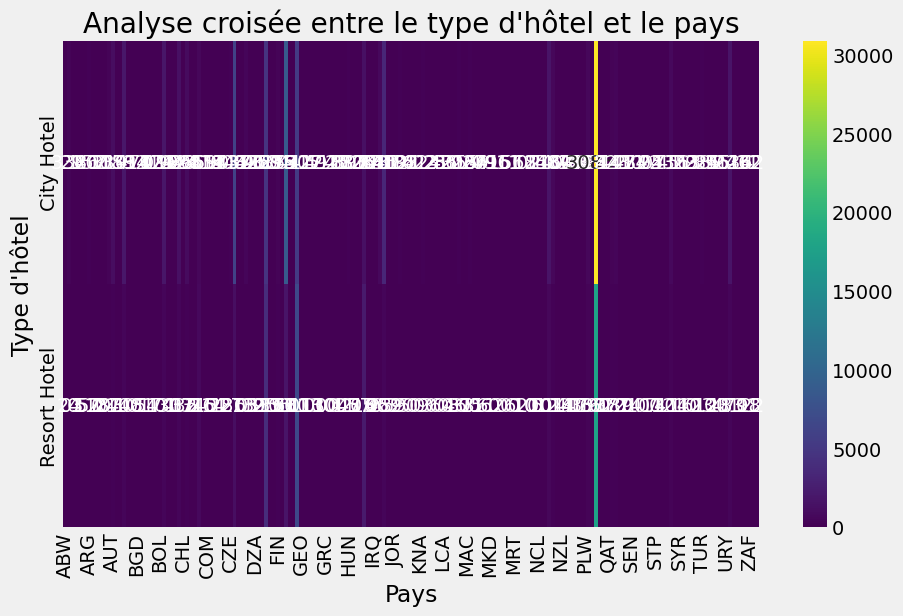

In [25]:
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab_country, cmap='viridis', annot=True, fmt='d')
plt.title('Analyse croisée entre le type d\'hôtel et le pays')
plt.xlabel('Pays')
plt.ylabel('Type d\'hôtel')
plt.show()

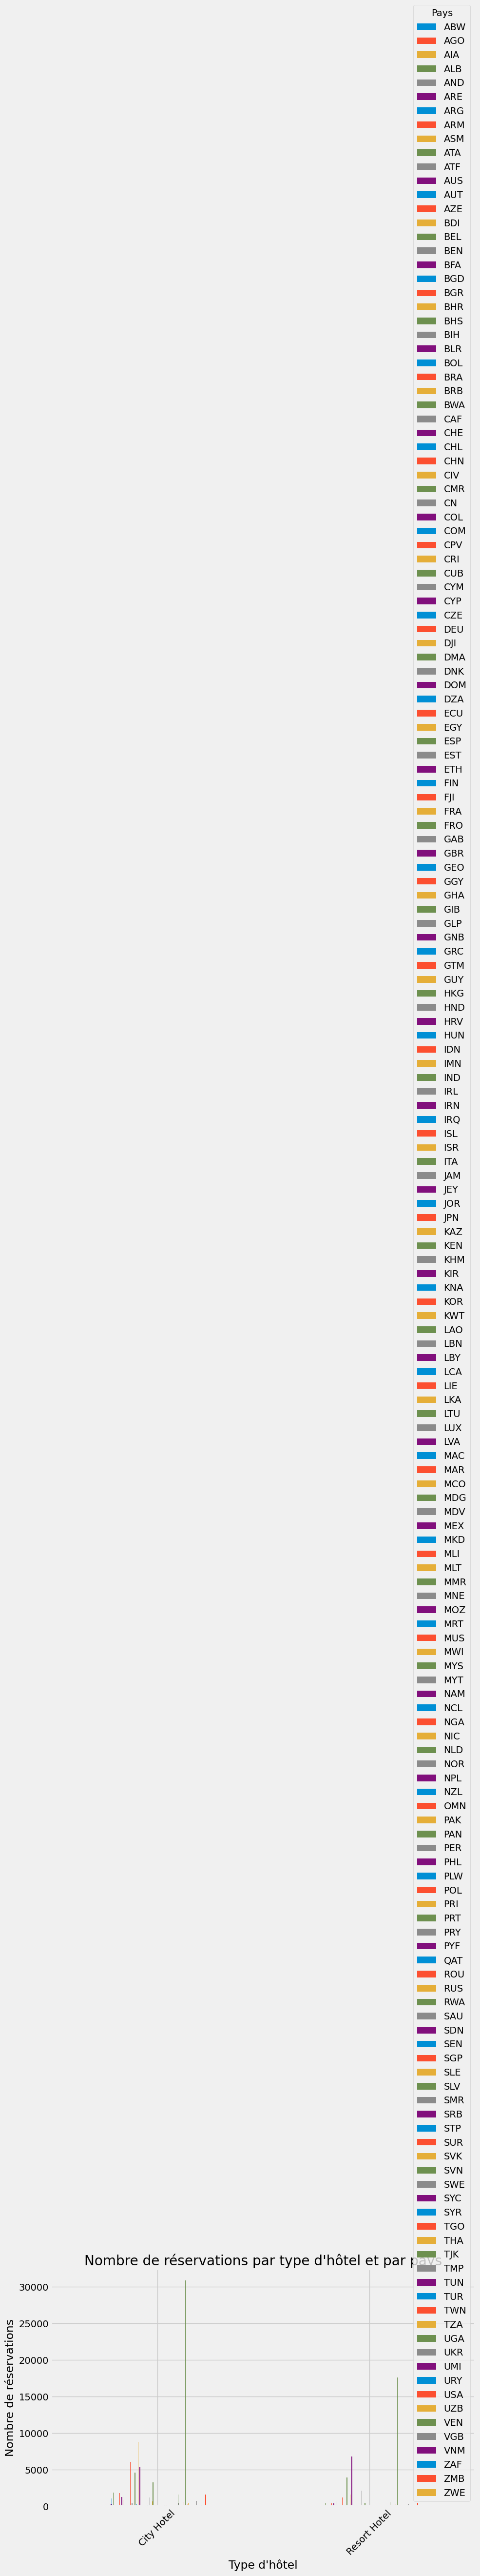

In [26]:
# Diagramme en barres groupées
cross_tab_country.plot(kind='bar', figsize=(10, 6))
plt.title('Nombre de réservations par type d\'hôtel et par pays')
plt.xlabel('Type d\'hôtel')
plt.ylabel('Nombre de réservations')
plt.xticks(rotation=45)
plt.legend(title='Pays')
plt.show()

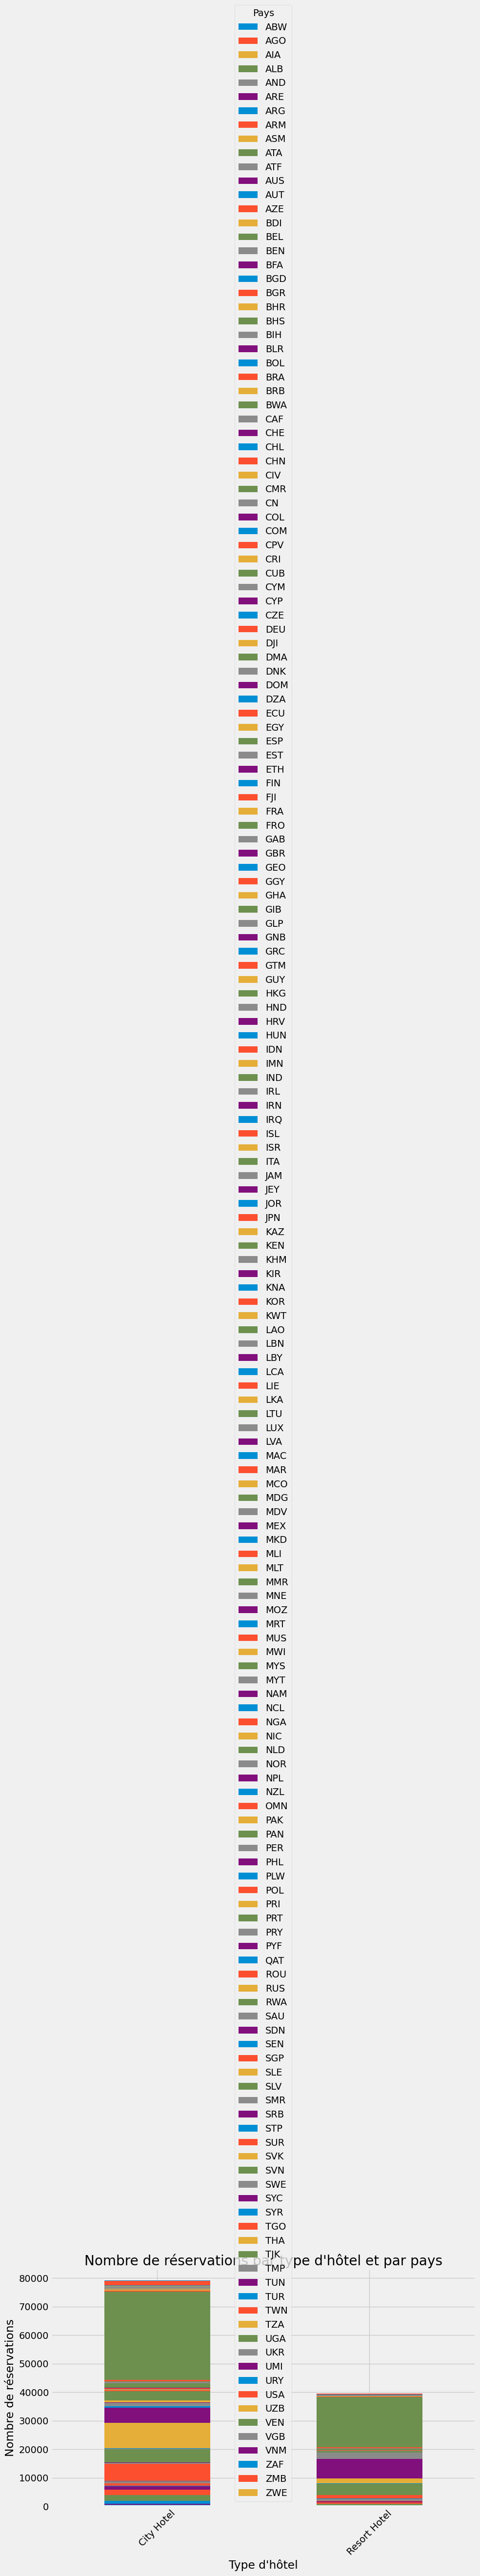

In [27]:
# Diagramme à bandes empilées
cross_tab_country.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Nombre de réservations par type d\'hôtel et par pays')
plt.xlabel('Type d\'hôtel')
plt.ylabel('Nombre de réservations')
plt.xticks(rotation=45)
plt.legend(title='Pays')
plt.show()

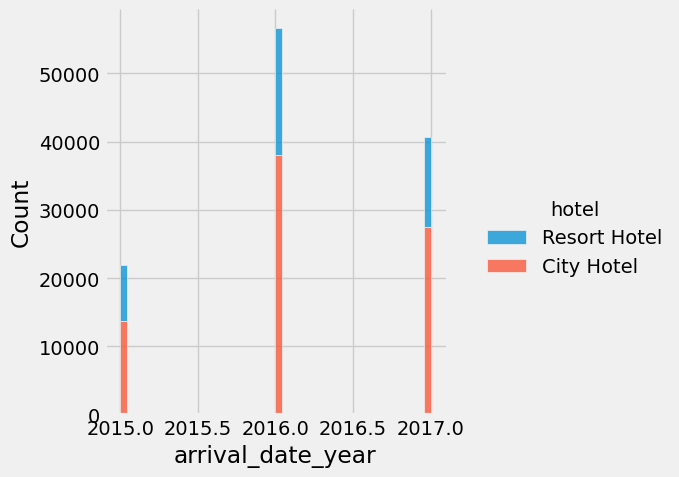

In [28]:
import seaborn as sns

# Histogramme : type d'hôtel en fonction de l'année
g = sns.displot(data=df, x="arrival_date_year", hue="hotel", kind="hist", multiple="stack")


In [29]:
# Supposons que df est votre DataFrame
# df = pd.read_csv('chemin_vers_votre_fichier.csv')

# Convertir les colonnes en une chaîne de caractères représentant une date
df['date_arrive'] = df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'].astype(str) + '-' + df['arrival_date_day_of_month'].astype(str)

# Maintenant, convertir cette chaîne en datetime
df['date_arrive'] = pd.to_datetime(df['date_arrive'])

# Calculer la date de départ
# Supposons que vous avez une colonne 'stays_in_week_nights' et 'stays_in_weekend_nights'
df['departure_date'] = df['date_arrive'] + pd.to_timedelta(df['stays_in_week_nights'] + df['stays_in_weekend_nights'], unit='D')

# Afficher les premières lignes pour vérifier
print(df[['date_arrive', 'departure_date']].head())

  date_arrive departure_date
0  2015-07-01     2015-07-01
1  2015-07-01     2015-07-01
2  2015-07-01     2015-07-02
3  2015-07-01     2015-07-02
4  2015-07-01     2015-07-03


C:\Users\goutali_abir\AppData\Local\Temp\ipykernel_14196\1513654504.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\goutali_abir\AppData\Local\Temp\ipykernel_14196\1513654504.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\goutali_abir\AppData\Local\Temp\ipykernel_14196\1513654504.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

In [30]:
df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
0                          0       2       0.0       0   BB     PRT   
1                          0       2       0.0       0   BB     PRT   
2                          1       1       0.0       0   BB     GBR   
3                          1       1       0.0       0   BB     GBR   
4                          2       2       0.0       0   BB     GBR   
...                      ...     ...       ...     ...  ...     ...   
119385                     5       2       0.0       0   BB     BEL   
119386                     5       3       0.0       0   BB     FRA   
119387                     5       2       0.0       0   BB     DEU   
119388                     5       2       0.0       0   BB     GBR   
119389                     7       2       0.0       0   HB     DEU   

       market_segment distribution_channel  ...  \
0              Direct               Direct  ...   
1              Direct               Direct  ...   
2              Direct               Direct  ...   
3           Corporate            Corporate  ...   
4           Online TA                TA/TO  ...   
...               ...                  ...  ...   
119385  Offline TA/TO                TA/TO  ...   
119386      Online TA                TA/TO  ...   
119387      Online TA                TA/TO  ...   
119388      Online TA                TA/TO  ...   
119389      Online TA                TA/TO  ...   

        previous_bookings_not_canceled  reserved_room_type  \
0                                    0                   C   
1                                    0                   C   
2                                    0                   A   
3                                    0                   A   
4                           

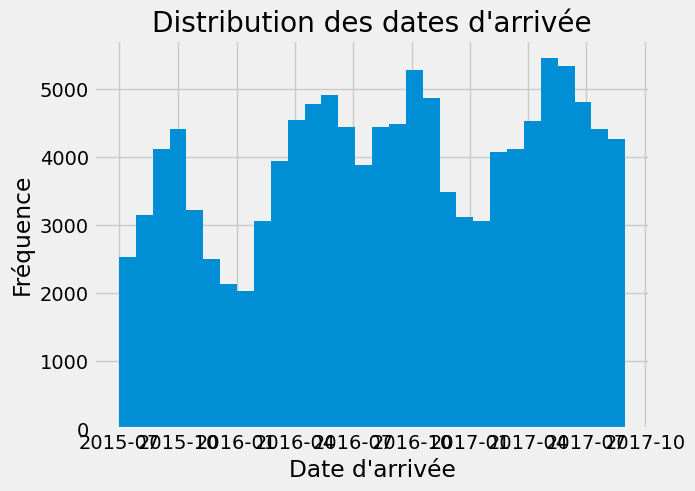

In [31]:
# Créer un histogramme pour la colonne date_arrive
df['date_arrive'].hist(bins=30)
plt.xlabel('Date d\'arrivée')
plt.ylabel('Fréquence')
plt.title('Distribution des dates d\'arrivée')
plt.show()

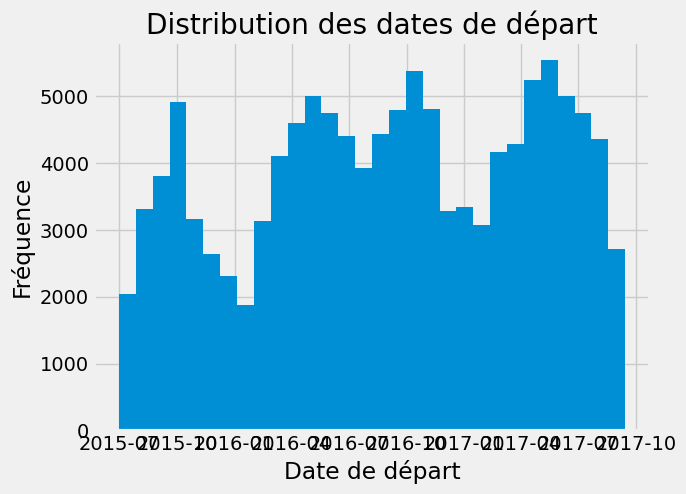

In [32]:
# Créer un histogramme pour la colonne departure_date
df['departure_date'].hist(bins=30)
plt.xlabel('Date de départ')
plt.ylabel('Fréquence')
plt.title('Distribution des dates de départ')
plt.show()